In [336]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### GATHERING DATA

In [337]:
pelanggan_df = pd.read_excel("dataset/Data Pelanggan.xlsx")

In [338]:
pelanggan_df.head()

,No. Reg,Tanggal Terpasang,Tanggal Jatuh Tempo,Nama,Paket,Durasi,Biaya,Deposit,Status
0,REGVB43151991166,24 September 2024 - 18:42,24 October 2024 - 23:59,Asep saepulloh,Promo Free 100Mbps,30,Rp 0,Rp 0,aktif trial
1,REGVB43151415629,24 September 2024 - 18:14,24 October 2024 - 23:59,YULI RAHMAWATI,Promo Free 100Mbps,30,Rp 0,Rp 0,aktif trial
2,REGVB43151147535,24 September 2024 - 17:36,24 October 2024 - 23:59,LINDAWATI,Promo Free 100Mbps,30,Rp 0,Rp 0,aktif trial
3,REGVB43115764638,24 September 2024 - 17:13,24 October 2024 - 23:59,MUFTI AQILA,Promo Free 100Mbps,30,Rp 0,Rp 0,aktif trial
4,REGVB43151814101,24 September 2024 - 17:07,24 October 2024 - 23:59,M ASSHIDIEK NURSYIFA,Promo Free 100Mbps,30,Rp 0,Rp 0,aktif trial


In [339]:
# ukuran baris dan kolom
pelanggan_df.shape

(707, 9)

In [340]:
# cek columns
pelanggan_df.columns

Index(['No. Reg', 'Tanggal Terpasang', 'Tanggal Jatuh Tempo', 'Nama', 'Paket',
       'Durasi', 'Biaya', 'Deposit', 'Status'],
      dtype='object')

### ASSESING DATA

In [341]:
# Ganti spasi dengan garis bawah
pelanggan_df.columns = pelanggan_df.columns.str.replace(' ', '_')
pelanggan_df = pelanggan_df.rename(columns={'No._Reg': 'No_Reg'})

In [342]:
pelanggan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   No_Reg               707 non-null    object
 1   Tanggal_Terpasang    707 non-null    object
 2   Tanggal_Jatuh_Tempo  707 non-null    object
 3   Nama                 707 non-null    object
 4   Paket                707 non-null    object
 5   Durasi               707 non-null    int64 
 6   Biaya                707 non-null    object
 7   Deposit              707 non-null    object
 8   Status               707 non-null    object
dtypes: int64(1), object(8)
memory usage: 49.8+ KB


In [343]:
pelanggan_df.isna().sum()

No_Reg                 0
Tanggal_Terpasang      0
Tanggal_Jatuh_Tempo    0
Nama                   0
Paket                  0
Durasi                 0
Biaya                  0
Deposit                0
Status                 0
dtype: int64

In [344]:
print ("Cek duplikat : ",pelanggan_df.duplicated().sum())

Cek duplikat :  0


In [345]:
# hapus kolom deposit karena nilainya 0 semua 
pelanggan_df = pelanggan_df.drop(columns=['Deposit'])

In [346]:
pelanggan_df.head()

,No_Reg,Tanggal_Terpasang,Tanggal_Jatuh_Tempo,Nama,Paket,Durasi,Biaya,Status
0,REGVB43151991166,24 September 2024 - 18:42,24 October 2024 - 23:59,Asep saepulloh,Promo Free 100Mbps,30,Rp 0,aktif trial
1,REGVB43151415629,24 September 2024 - 18:14,24 October 2024 - 23:59,YULI RAHMAWATI,Promo Free 100Mbps,30,Rp 0,aktif trial
2,REGVB43151147535,24 September 2024 - 17:36,24 October 2024 - 23:59,LINDAWATI,Promo Free 100Mbps,30,Rp 0,aktif trial
3,REGVB43115764638,24 September 2024 - 17:13,24 October 2024 - 23:59,MUFTI AQILA,Promo Free 100Mbps,30,Rp 0,aktif trial
4,REGVB43151814101,24 September 2024 - 17:07,24 October 2024 - 23:59,M ASSHIDIEK NURSYIFA,Promo Free 100Mbps,30,Rp 0,aktif trial


In [347]:
pelanggan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   No_Reg               707 non-null    object
 1   Tanggal_Terpasang    707 non-null    object
 2   Tanggal_Jatuh_Tempo  707 non-null    object
 3   Nama                 707 non-null    object
 4   Paket                707 non-null    object
 5   Durasi               707 non-null    int64 
 6   Biaya                707 non-null    object
 7   Status               707 non-null    object
dtypes: int64(1), object(7)
memory usage: 44.3+ KB


In [348]:
# Mengonversi tipe data kolom tanggal
pelanggan_df['Tanggal_Terpasang'] = pd.to_datetime(pelanggan_df['Tanggal_Terpasang'], errors='coerce')
pelanggan_df['Tanggal_Jatuh_Tempo'] = pd.to_datetime(pelanggan_df['Tanggal_Jatuh_Tempo'], errors='coerce')

biaya_columns = ['Biaya']

# Menghapus simbol 'Rp' dan karakter lainnya, lalu mengubah ke tipe int64
for col in biaya_columns:
    # Pastikan kolom adalah tipe string
    pelanggan_df[col] = pelanggan_df[col].astype(str)  # Mengonversi menjadi string
    
    # Menghilangkan 'Rp' di awal dan tanda titik pemisah ribuan, jika ada
    pelanggan_df[col] = pelanggan_df[col].str.replace('Rp', '', regex=False).str.replace('.', '', regex=False).str.strip()
    
    # Mengonversi tipe data menjadi int64, menjaga nilai 0
    pelanggan_df[col] = pd.to_numeric(pelanggan_df[col], errors='coerce').fillna(0).astype('int64')

In [349]:
pelanggan_df.dtypes

No_Reg                         object
Tanggal_Terpasang      datetime64[ns]
Tanggal_Jatuh_Tempo    datetime64[ns]
Nama                           object
Paket                          object
Durasi                          int64
Biaya                           int64
Status                         object
dtype: object

In [350]:
pelanggan_df.head()

,No_Reg,Tanggal_Terpasang,Tanggal_Jatuh_Tempo,Nama,Paket,Durasi,Biaya,Status
0,REGVB43151991166,2024-09-24 18:42:00,2024-10-24 23:59:00,Asep saepulloh,Promo Free 100Mbps,30,0,aktif trial
1,REGVB43151415629,2024-09-24 18:14:00,2024-10-24 23:59:00,YULI RAHMAWATI,Promo Free 100Mbps,30,0,aktif trial
2,REGVB43151147535,2024-09-24 17:36:00,2024-10-24 23:59:00,LINDAWATI,Promo Free 100Mbps,30,0,aktif trial
3,REGVB43115764638,2024-09-24 17:13:00,2024-10-24 23:59:00,MUFTI AQILA,Promo Free 100Mbps,30,0,aktif trial
4,REGVB43151814101,2024-09-24 17:07:00,2024-10-24 23:59:00,M ASSHIDIEK NURSYIFA,Promo Free 100Mbps,30,0,aktif trial


In [351]:
# Menstandarisasi kolom 'Nama' agar huruf besar hanya di awal setiap kata
pelanggan_df['Nama'] = pelanggan_df['Nama'].str.title()

# Cek hasil perubahan
print(pelanggan_df['Nama'].head())


0          Asep Saepulloh
1         Yuli Rahmawati 
2               Lindawati
3             Mufti Aqila
4    M Asshidiek Nursyifa
Name: Nama, dtype: object


In [352]:
pelanggan_df.head()

,No_Reg,Tanggal_Terpasang,Tanggal_Jatuh_Tempo,Nama,Paket,Durasi,Biaya,Status
0,REGVB43151991166,2024-09-24 18:42:00,2024-10-24 23:59:00,Asep Saepulloh,Promo Free 100Mbps,30,0,aktif trial
1,REGVB43151415629,2024-09-24 18:14:00,2024-10-24 23:59:00,Yuli Rahmawati,Promo Free 100Mbps,30,0,aktif trial
2,REGVB43151147535,2024-09-24 17:36:00,2024-10-24 23:59:00,Lindawati,Promo Free 100Mbps,30,0,aktif trial
3,REGVB43115764638,2024-09-24 17:13:00,2024-10-24 23:59:00,Mufti Aqila,Promo Free 100Mbps,30,0,aktif trial
4,REGVB43151814101,2024-09-24 17:07:00,2024-10-24 23:59:00,M Asshidiek Nursyifa,Promo Free 100Mbps,30,0,aktif trial


In [353]:
pelanggan_df.describe(include='all')

,No_Reg,Tanggal_Terpasang,Tanggal_Jatuh_Tempo,Nama,Paket,Durasi,Biaya,Status
count,707,707,707,707,707,707.000000,707.000000,707
unique,707,NaN,NaN,704,10,NaN,NaN,5
top,REGVB43192298465,NaN,NaN,Saepul Alam,Promo Free 100Mbps,NaN,NaN,aktif
freq,1,NaN,NaN,2,339,NaN,NaN,350
mean,NaN,2024-08-25 05:30:37.256011008,2024-10-12 00:43:48.543140096,NaN,NaN,31.421499,63417.538897,NaN
min,NaN,2024-08-02 16:58:00,2024-08-02 23:59:00,NaN,NaN,30.000000,0.000000,NaN
25%,NaN,2024-08-08 13:19:00,2024-10-03 23:59:00,NaN,NaN,30.000000,0.000000,NaN
50%,NaN,2024-08-22 14:41:00,2024-10-10 23:59:00,NaN,NaN,30.000000,0.000000,NaN
75%,NaN,2024-09-06 13:17:00,2024-10-19 23:59:00,NaN,NaN,30.000000,99000.000000,NaN
max,NaN,2024-09-24 18:42:00,2025-08-26 23:59:00,NaN,NaN,365.000000,555000.000000,NaN


### EDA 

In [354]:
# menampilkan deskriptif statik
pelanggan_df.describe(include="all")

,No_Reg,Tanggal_Terpasang,Tanggal_Jatuh_Tempo,Nama,Paket,Durasi,Biaya,Status
count,707,707,707,707,707,707.000000,707.000000,707
unique,707,NaN,NaN,704,10,NaN,NaN,5
top,REGVB43192298465,NaN,NaN,Saepul Alam,Promo Free 100Mbps,NaN,NaN,aktif
freq,1,NaN,NaN,2,339,NaN,NaN,350
mean,NaN,2024-08-25 05:30:37.256011008,2024-10-12 00:43:48.543140096,NaN,NaN,31.421499,63417.538897,NaN
min,NaN,2024-08-02 16:58:00,2024-08-02 23:59:00,NaN,NaN,30.000000,0.000000,NaN
25%,NaN,2024-08-08 13:19:00,2024-10-03 23:59:00,NaN,NaN,30.000000,0.000000,NaN
50%,NaN,2024-08-22 14:41:00,2024-10-10 23:59:00,NaN,NaN,30.000000,0.000000,NaN
75%,NaN,2024-09-06 13:17:00,2024-10-19 23:59:00,NaN,NaN,30.000000,99000.000000,NaN
max,NaN,2024-09-24 18:42:00,2025-08-26 23:59:00,NaN,NaN,365.000000,555000.000000,NaN


In [355]:
# Menghitung lama berlangganan dalam hari
pelanggan_df['Lama_Berlangganan'] = (pelanggan_df['Tanggal_Jatuh_Tempo'] - pelanggan_df['Tanggal_Terpasang']).dt.days

# Menandai churn (jika status adalah isolir atau dismantle)
pelanggan_df['Churn'] = pelanggan_df['Status'].apply(lambda x: "Ya" if x in ['isolir', 'dismantle', 'dismantle trial'] else "Tidak")

In [356]:
pelanggan_df.head()

,No_Reg,Tanggal_Terpasang,Tanggal_Jatuh_Tempo,Nama,Paket,Durasi,Biaya,Status,Lama_Berlangganan,Churn
0,REGVB43151991166,2024-09-24 18:42:00,2024-10-24 23:59:00,Asep Saepulloh,Promo Free 100Mbps,30,0,aktif trial,30,Tidak
1,REGVB43151415629,2024-09-24 18:14:00,2024-10-24 23:59:00,Yuli Rahmawati,Promo Free 100Mbps,30,0,aktif trial,30,Tidak
2,REGVB43151147535,2024-09-24 17:36:00,2024-10-24 23:59:00,Lindawati,Promo Free 100Mbps,30,0,aktif trial,30,Tidak
3,REGVB43115764638,2024-09-24 17:13:00,2024-10-24 23:59:00,Mufti Aqila,Promo Free 100Mbps,30,0,aktif trial,30,Tidak
4,REGVB43151814101,2024-09-24 17:07:00,2024-10-24 23:59:00,M Asshidiek Nursyifa,Promo Free 100Mbps,30,0,aktif trial,30,Tidak


In [357]:
# Menghitung jumlah pelaanggan yang berlanagganan berdasarkan jenis paket
result_jenis = pelanggan_df.groupby('Paket')['No_Reg'].nunique()
result_jenis

Paket
FASUM 20 Mbps 1Y             3
LINK 200 Mbps - 30d         38
LINK 250 Mbps - 30d         47
LINK 300 Mbps - 30d          5
LINK 400 Mbps - 30d          4
LINK 500 Mbps - 30d          1
LITE link 100Mbps - 30d    240
Promo Free 100Mbps         339
[Migrasi] LINK 200           9
[Migrasi] LINK 250          21
Name: No_Reg, dtype: int64

In [358]:
status_counts = pelanggan_df['Paket'].value_counts()
print(status_counts)


Paket
Promo Free 100Mbps         339
LITE link 100Mbps - 30d    240
LINK 250 Mbps - 30d         47
LINK 200 Mbps - 30d         38
[Migrasi] LINK 250          21
[Migrasi] LINK 200           9
LINK 300 Mbps - 30d          5
LINK 400 Mbps - 30d          4
FASUM 20 Mbps 1Y             3
LINK 500 Mbps - 30d          1
Name: count, dtype: int64


In [359]:
# Konversi kolom 'Tanggal_Terpasang' ke tipe datetime
pelanggan_df['Tanggal_Terpasang'].dt.day_name()

# Menghitung frekuensi nilai berdasarkan hari dalam seminggu
result_waktu = pelanggan_df['Tanggal_Terpasang'].value_counts()

# Menampilkan hasil
print(result_waktu)

Tanggal_Terpasang
2024-09-11 13:43:00    2
2024-08-22 16:25:00    2
2024-09-10 14:59:00    2
2024-09-19 19:37:00    2
2024-08-21 16:14:00    2
                      ..
2024-08-02 17:37:00    1
2024-08-02 17:27:00    1
2024-08-02 17:22:00    1
2024-08-02 17:14:00    1
2024-09-24 12:23:00    1
Name: count, Length: 699, dtype: int64


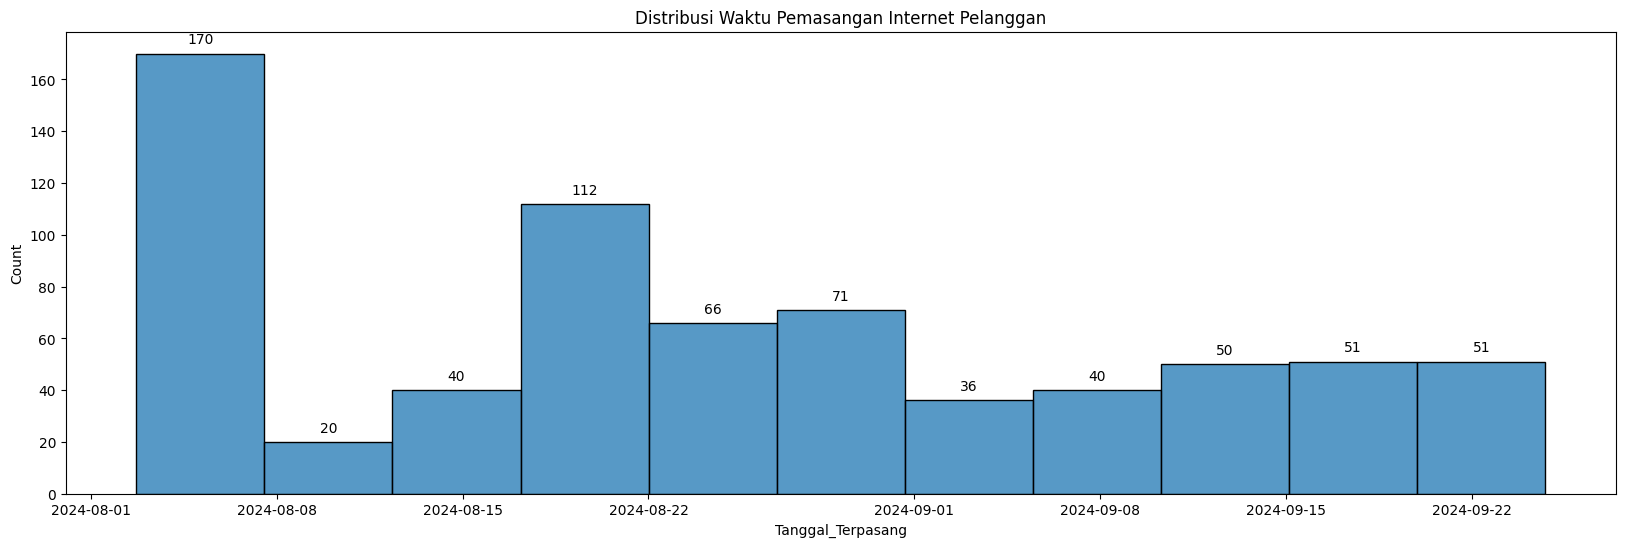

In [360]:
# Plotting
plt.figure(figsize=(20, 6))
ax = sns.histplot(pelanggan_df['Tanggal_Terpasang'])

# Menambahkan label angka pada setiap batang bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribusi Waktu Pemasangan Internet Pelanggan')
plt.show()

### prediksi churn

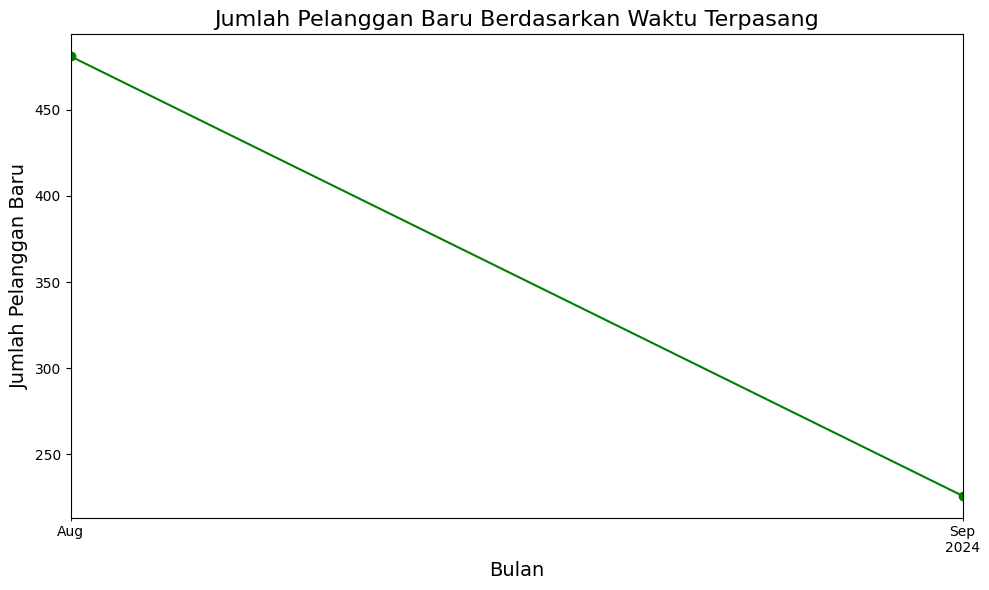

In [361]:
# Menghitung jumlah pelanggan berdasarkan tanggal terpasang
pelanggan_by_date = pelanggan_df.groupby(pelanggan_df['Tanggal_Terpasang'].dt.to_period('M'))['No_Reg'].nunique()

# Membuat line chart
plt.figure(figsize=(10, 6))
pelanggan_by_date.plot(kind='line', marker='o', color='green')

plt.title('Jumlah Pelanggan Baru Berdasarkan Waktu Terpasang', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Jumlah Pelanggan Baru', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Paket Mana yang Paling Banyak Diminati oleh Pelanggan di bulan Agustus 2024 (1)

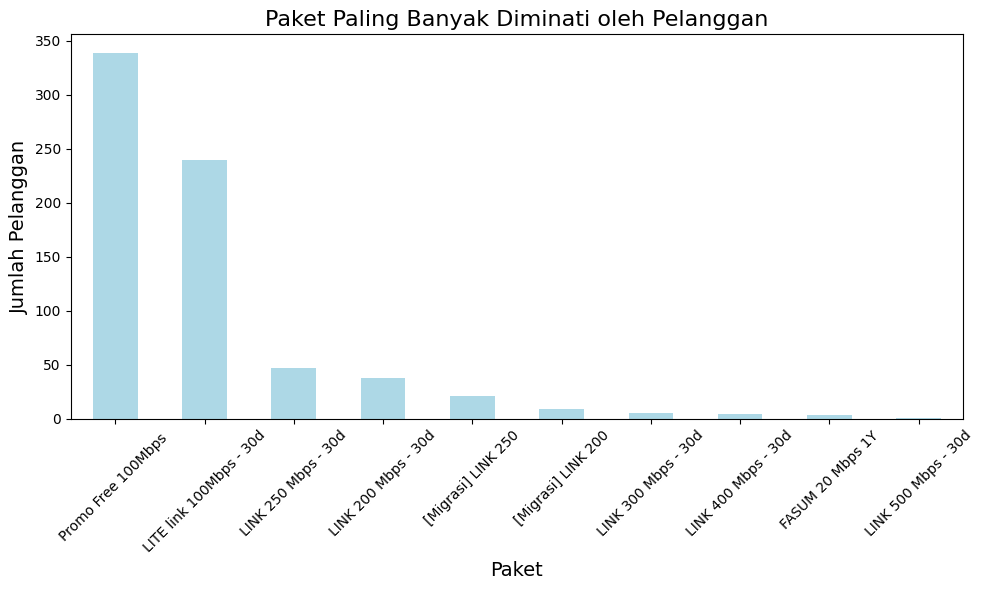

In [362]:
# salah ini untuk agustus - september

# Menghitung jumlah pelanggan per paket
paket_counts = pelanggan_df.groupby('Paket')['No_Reg'].nunique()

# Visualisasi paket yang paling diminati
plt.figure(figsize=(10, 6))
paket_counts.sort_values(ascending=False).plot(kind='bar', color='lightblue')
plt.title('Paket Paling Banyak Diminati oleh Pelanggan', fontsize=16)
plt.xlabel('Paket', fontsize=14)
plt.ylabel('Jumlah Pelanggan', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [363]:
bystatus_df = pelanggan_df.groupby(by='Status').No_Reg.nunique().reset_index()
bystatus_df.rename(columns={
    'No_Reg': 'customer_count'
}, inplace=True)
bystatus_df

,Status,customer_count
0,aktif,350
1,aktif trial,307
2,dismantle,6
3,dismantle trial,3
4,isolir,41


C:\Users\faisa\AppData\Local\Temp\ipykernel_35976\1354497248.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Figure size 1000x500 with 0 Axes>

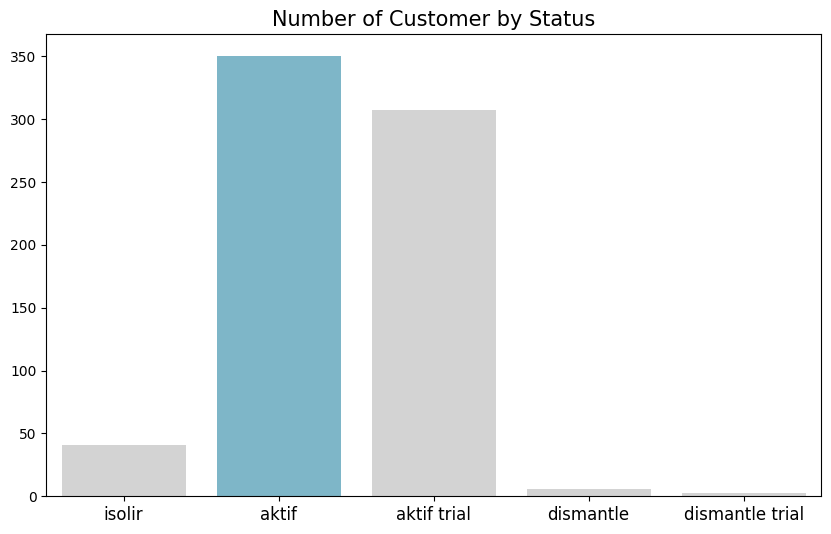

In [364]:

bystatus_df['Status'] = pd.Categorical(bystatus_df['Status'], ["isolir", "aktif", "aktif trial","dismantle","dismantle trial"])
plt.figure(figsize=(10,5))
colors_ = ["#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(10,6))

sns.barplot(
    y='customer_count',
    x='Status',
    data=bystatus_df.sort_values(by='customer_count', ascending=False),
    palette=colors_
)
plt.title("Number of Customer by Status", loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Bagaimana Tingkat Churn Berdasarkan Jenis Paket untuk Pelanggan yang Terpasang di Bulan Agustus 2024 ?

In [365]:
status_counts = pelanggan_df['Status'].value_counts()
print(status_counts)


Status
aktif              350
aktif trial        307
isolir              41
dismantle            6
dismantle trial      3
Name: count, dtype: int64


In [366]:
# Memperbarui kondisi churn
# pelanggan_df['Churn'] = pelanggan_df['Status'].apply(lambda x: 1 if x in ['isolir','dismantle', 'dismantle trial'] else 0)

# Cek jumlah churn dan tidak churn
print(pelanggan_df['Churn'].value_counts())



Churn
Tidak    657
Ya        50
Name: count, dtype: int64


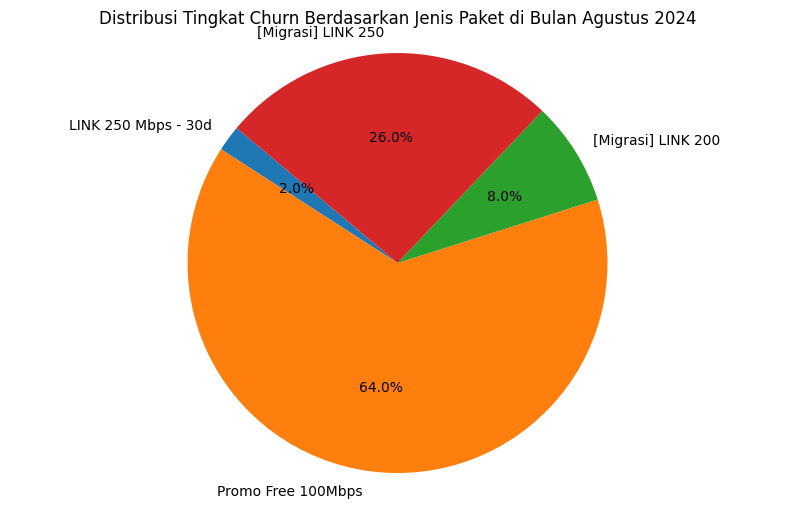

In [367]:
tingkat_churn['Churn (%)'] = tingkat_churn['Churn'] * 100

# Memfilter paket dengan churn > 0
tingkat_churn_filtered = tingkat_churn[tingkat_churn['Churn (%)'] > 0]

# Mengatur label dan nilai untuk pie chart
labels = tingkat_churn_filtered['Paket']
sizes = tingkat_churn_filtered['Churn (%)']

# Membuat pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Tingkat Churn Berdasarkan Jenis Paket di Bulan Agustus 2024')
plt.axis('equal')  # Agar pie chart bulat
plt.show()

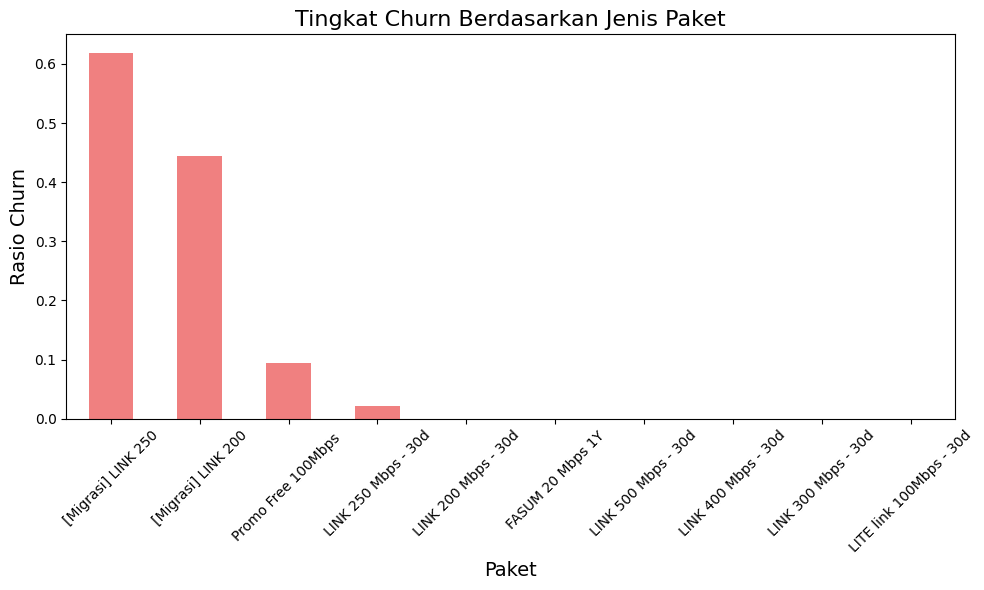

In [368]:
pelanggan_df['Churn_numeric'] = pelanggan_df['Churn'].map({'Ya': 1, 'Tidak': 0})

# Menghitung churn per paket
churn_paket = pelanggan_df.groupby('Paket')['Churn_numeric'].mean()

# Visualisasi churn rate per paket
plt.figure(figsize=(10, 6))
churn_paket.sort_values(ascending=False).plot(kind='bar', color='lightcoral')
plt.title('Tingkat Churn Berdasarkan Jenis Paket', fontsize=16)
plt.xlabel('Paket', fontsize=14)
plt.ylabel('Rasio Churn', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Apakah Biaya Berlangganan Mempengaruhi Tingkat Churn di Antara Pelanggan yang Terpasang pada Agustus 2024?

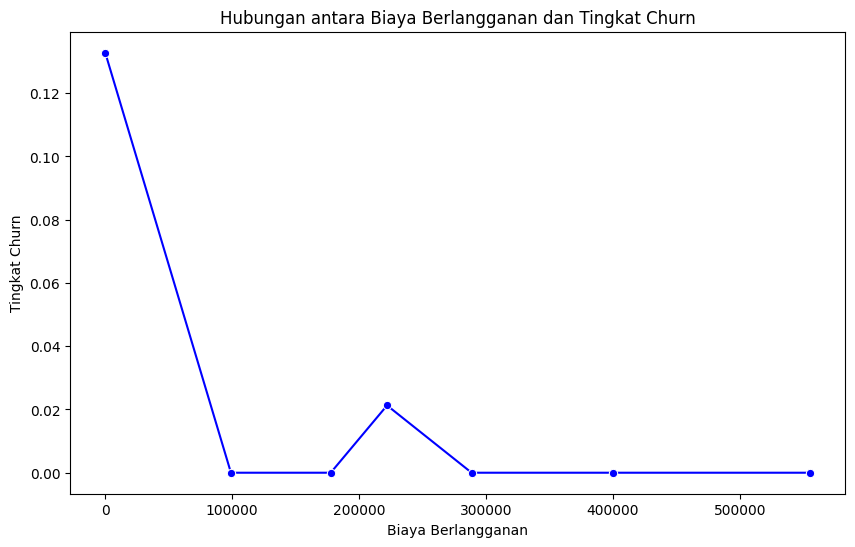

In [369]:
biaya_churn = pelanggan_df.groupby('Biaya')['Churn_numeric'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Biaya', y='Churn_numeric', data=biaya_churn, marker='o', color='blue')
plt.title('Hubungan antara Biaya Berlangganan dan Tingkat Churn')
plt.xlabel('Biaya Berlangganan')
plt.ylabel('Tingkat Churn')
plt.show()

Jika garis menunjukkan tren meningkat seiring dengan meningkatnya biaya, ini bisa diartikan bahwa biaya yang lebih tinggi berhubungan dengan tingkat churn yang lebih tinggi. Sebaliknya, jika garis menurun, ini menunjukkan bahwa pelanggan lebih mungkin untuk tetap berlangganan saat biayanya lebih tinggi.

### Persebaran Pelanggan Berdasarkan Status (Aktif, Isolir, Dismantle, Aktif Trial, Dismantle Trial) untuk Pelanggan yang Terpasang di Bulan Agustus 2024? 

C:\Users\faisa\AppData\Local\Temp\ipykernel_35976\2570776254.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_count.index, y=status_count.values, palette='coolwarm')


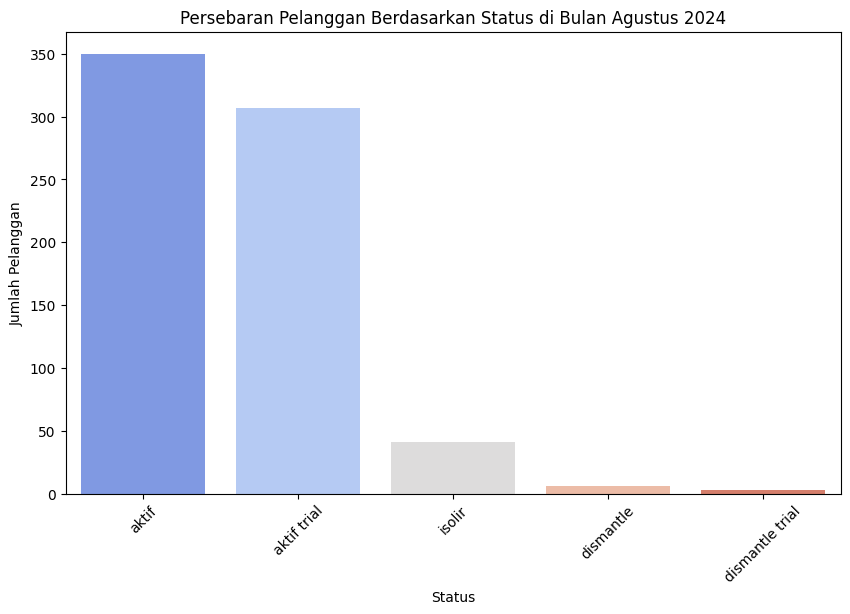

In [370]:
status_count = pelanggan_df['Status'].value_counts()    

plt.figure(figsize=(10, 6))
sns.barplot(x=status_count.index, y=status_count.values, palette='coolwarm')
plt.title('Persebaran Pelanggan Berdasarkan Status di Bulan Agustus 2024')
plt.xlabel('Status')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.show()

### Bagaimana Tren Waktu Pembayaran Pelanggan yang Terpasang pada Agustus 2024?


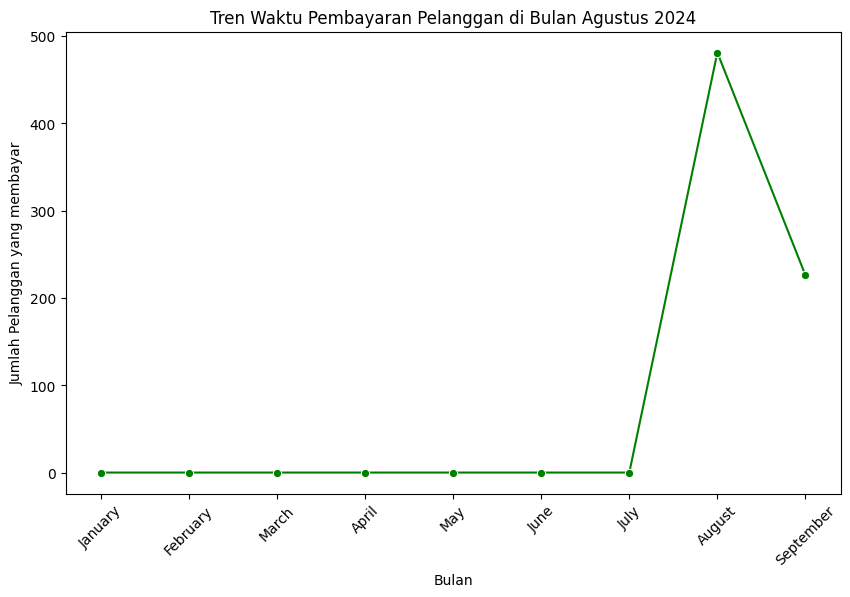

In [371]:
pelanggan_df['Tanggal_Terpasang'] = pd.to_datetime(pelanggan_df['Tanggal_Terpasang'])
pelanggan_df['Bulan'] = pelanggan_df['Tanggal_Terpasang'].dt.month_name()

tren_pembayaran = pelanggan_df['Bulan'].value_counts().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September'], fill_value=0)

plt.figure(figsize=(10, 6))
sns.lineplot(x=tren_pembayaran.index, y=tren_pembayaran.values, marker='o', color='green')
plt.title('Tren Waktu Pembayaran Pelanggan di Bulan Agustus 2024')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pelanggan yang membayar')
plt.xticks(rotation=45)
plt.show()

### Bagaimana Tingkat Churn Berdasarkan Status Pelanggan ?

In [372]:
# Misalkan all_data adalah DataFrame Anda yang sudah memuat data pelanggan
# Menghitung jumlah pelanggan berdasarkan status
status_counts = pelanggan_df['Status'].value_counts()

# Jumlah total pelanggan
total_customers = status_counts.sum()

# Menghitung churn rate
# Misalkan kita anggap 'Isolir' dan 'Dismantle' adalah status churn
churned_customers = status_counts.get('isolir', 0) + status_counts.get('dismantle', 0) + status_counts.get('dismantle trial', 0) 
churn_rate = (churned_customers / total_customers) * 100

# Membuat DataFrame untuk visualisasi
churn_rate_df = pd.DataFrame({
    'Status': status_counts.index,
    'Jumlah_Pelanggan': status_counts.values
})

# Menambahkan kolom Churn Rate
churn_rate_df['Churn_Rate (%)'] = (churn_rate_df['Jumlah_Pelanggan'] / total_customers) * 100

# Menampilkan hasil
print("Churn Rate berdasarkan Status Pelanggan:")
print(churn_rate_df)

print(f"\nTotal Churn Rate: {churn_rate:.2f}%")

Churn Rate berdasarkan Status Pelanggan:
            Status  Jumlah_Pelanggan  Churn_Rate (%)
0            aktif               350       49.504950
1      aktif trial               307       43.422914
2           isolir                41        5.799151
3        dismantle                 6        0.848656
4  dismantle trial                 3        0.424328

Total Churn Rate: 7.07%


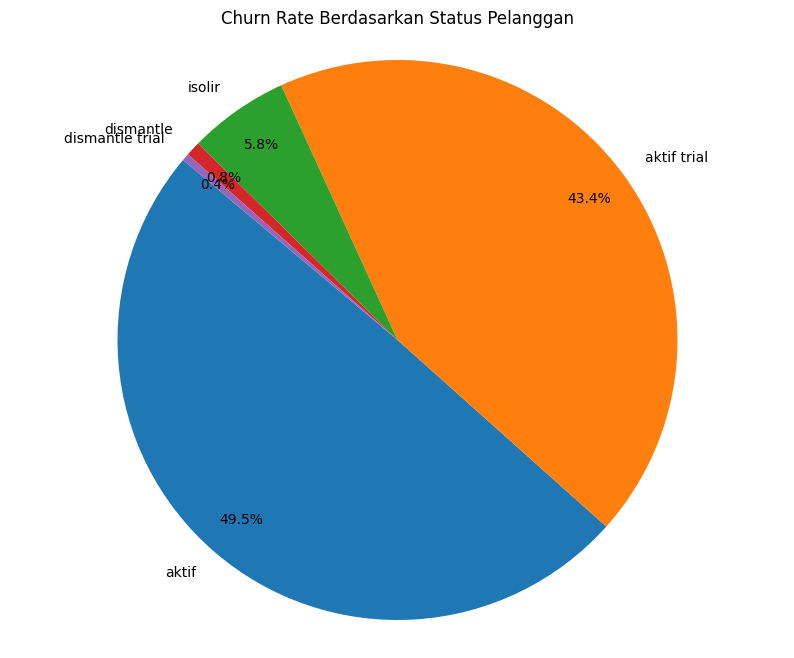

In [373]:
# Membuat Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(
    churn_rate_df['Jumlah_Pelanggan'], 
    labels=churn_rate_df['Status'], 
    autopct='%1.1f%%', 
    startangle=140,
    pctdistance=0.85
    )
plt.title('Churn Rate Berdasarkan Status Pelanggan')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.
plt.show()

In [374]:
# jumlah status 

status_counts = pelanggan_df['Status'].value_counts()
print(status_counts)


Status
aktif              350
aktif trial        307
isolir              41
dismantle            6
dismantle trial      3
Name: count, dtype: int64


### PERSEBARAN PELANGGAN BERDASARKAN STATUS PAKET

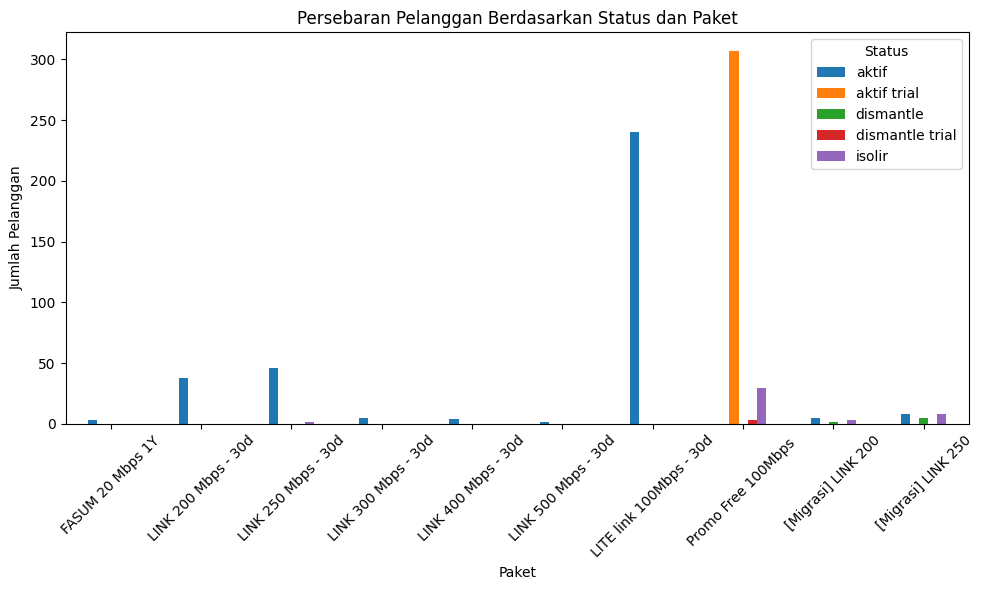

In [375]:
import matplotlib.pyplot as plt

pivot_table = pelanggan_df.pivot_table(index='Paket', columns='Status', aggfunc='size', fill_value=0)

# Bar chart untuk visualisasi pivot table
pivot_table.plot(kind='bar', figsize=(10, 6))

plt.title('Persebaran Pelanggan Berdasarkan Status dan Paket')
plt.xlabel('Paket')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)  # Memutar label pada sumbu X agar lebih mudah dibaca
plt.legend(title='Status')
plt.tight_layout()  # Agar tampilan tidak terpotong
plt.show()


### REVENUE BERDASARKAN PAKET 

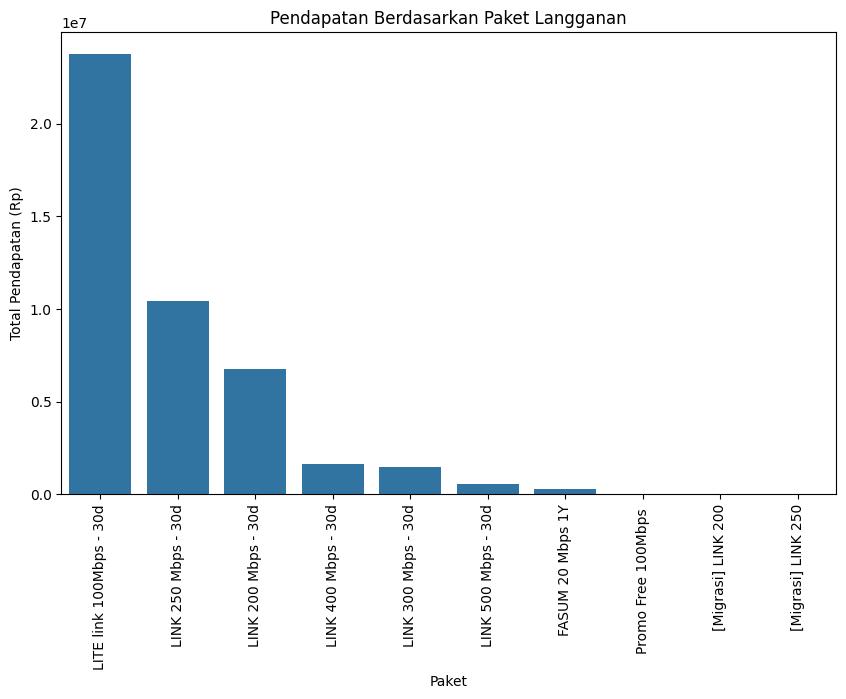

In [376]:
# Analisis pendapatan per paket
paket_revenue = pelanggan_df.groupby('Paket')['Biaya'].sum().sort_values(ascending=False)

# Visualisasi
plt.figure(figsize=(10,6))
sns.barplot(x=paket_revenue.index, y=paket_revenue.values)
plt.xticks(rotation=90)
plt.title("Pendapatan Berdasarkan Paket Langganan")
plt.ylabel("Total Pendapatan (Rp)")
plt.show()


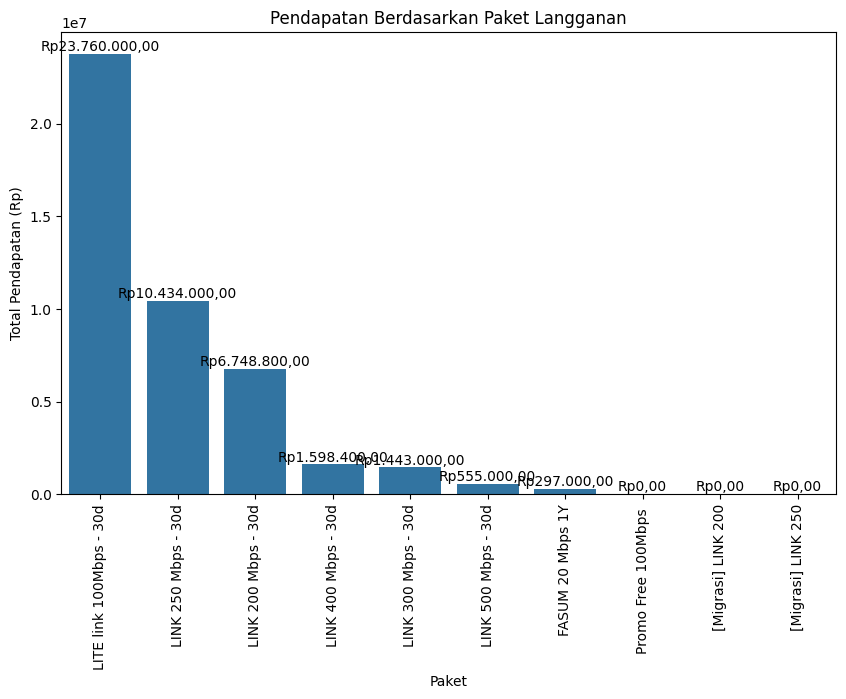

In [377]:
from babel.numbers import format_currency  # Pastikan ini diimpor

# Analisis pendapatan per paket
paket_revenue = pelanggan_df.groupby('Paket')['Biaya'].sum().sort_values(ascending=False)


# Format total pendapatan menjadi Rupiah
paket_revenue_rupiah = [format_currency(value, 'IDR', locale='id_ID') for value in paket_revenue.values]

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=paket_revenue.index, y=paket_revenue.values)
plt.xticks(rotation=90)
plt.title("Pendapatan Berdasarkan Paket Langganan")
plt.ylabel("Total Pendapatan (Rp)")

# Menambahkan label pada setiap bar
for index, value in enumerate(paket_revenue_rupiah):
    plt.text(index, paket_revenue.values[index], value, ha='center', va='bottom')

plt.show()


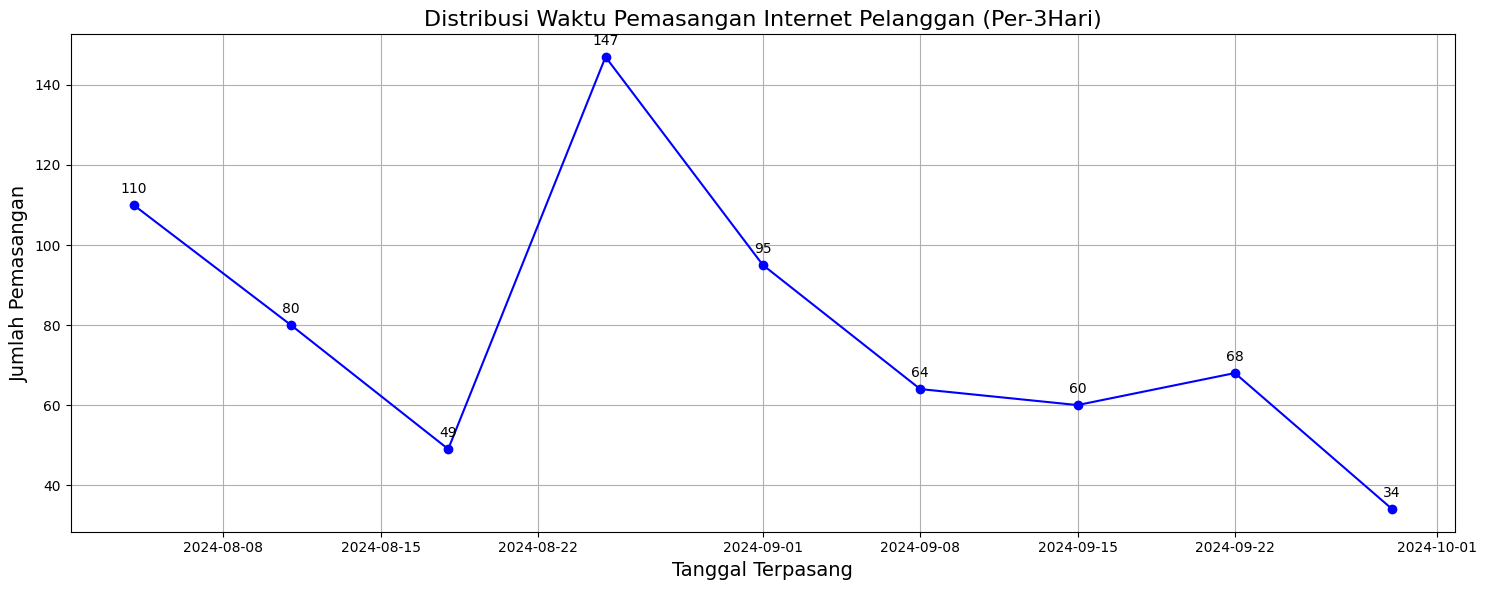

In [378]:
weekly_installations = pelanggan_df.resample('W', on='Tanggal_Terpasang').size()

# Membuat line plot untuk distribusi pemasangan per minggu
plt.figure(figsize=(15, 6))
plt.plot(weekly_installations.index, weekly_installations.values, color='blue', marker='o')

# memberikan label angka pada setiap titik
for i, value in enumerate(weekly_installations.values):
    plt.text(weekly_installations.index[i], value + 3, str(value), ha='center', fontsize=10, color='black')

    
# Memberikan judul dan label pada grafik
plt.title('Distribusi Waktu Pemasangan Internet Pelanggan (Per-3Hari)', fontsize=16)
plt.xlabel('Tanggal Terpasang', fontsize=14)
plt.ylabel('Jumlah Pemasangan', fontsize=14)

# Menampilkan grid dan plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [379]:
# Filter data untuk bulan Agustus
august_data = pelanggan_df[pelanggan_df['Tanggal_Terpasang'].dt.month == 8]

# Tambahkan kolom minggu (week number) berdasarkan Tanggal Aktif
august_data['Minggu_Ke'] = august_data['Tanggal_Terpasang'].dt.isocalendar().week

# Filter data untuk minggu pertama bulan Agustus (misalnya minggu ke-31 tahun ini)
minggu_pertama_agustus = august_data[august_data['Minggu_Ke'] == august_data['Tanggal_Terpasang'].dt.isocalendar().week.min()]

# Menampilkan detail pelanggan yang memasang internet di minggu pertama bulan Agustus
print("Data pelanggan yang memasang internet pada minggu pertama bulan Agustus:")
print(minggu_pertama_agustus[['No_Reg', 'Nama', 'Tanggal_Terpasang']])


Data pelanggan yang memasang internet pada minggu pertama bulan Agustus:
               No_Reg                     Nama   Tanggal_Terpasang
597  REGVB43192658805             Zihan Sanova 2024-08-04 18:43:00
598  REGVB43192100034             Yuni Safitri 2024-08-04 17:58:00
599  REGVB43192762387  Intan Sri Sugiharlianti 2024-08-04 17:52:00
600  REGVB43192342384            Julfah Iryani 2024-08-04 17:51:00
601  REGVB43192994903      Fitri Dewi Andriani 2024-08-04 17:47:00
..                ...                      ...                 ...
702  REGVB43192787309           Enza Pebrianty 2024-08-02 17:37:00
703  REGVB43192407277             Ahmad Sofuan 2024-08-02 17:27:00
704  REGVB43192634255             Ratna Juwita 2024-08-02 17:22:00
705  REGVB43192178399           Pricilia Putri 2024-08-02 17:14:00
706  REGVB43192298465             Sopyan Sauri 2024-08-02 16:58:00

[110 rows x 3 columns]


C:\Users\faisa\AppData\Local\Temp\ipykernel_35976\363212680.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  august_data['Minggu_Ke'] = august_data['Tanggal_Terpasang'].dt.isocalendar().week


Jumlah pemasangan per minggu:
Tanggal_Terpasang
2024-08-05    142
2024-08-12     53
2024-08-19     71
2024-08-26    143
2024-09-02     72
Freq: W-MON, dtype: int64


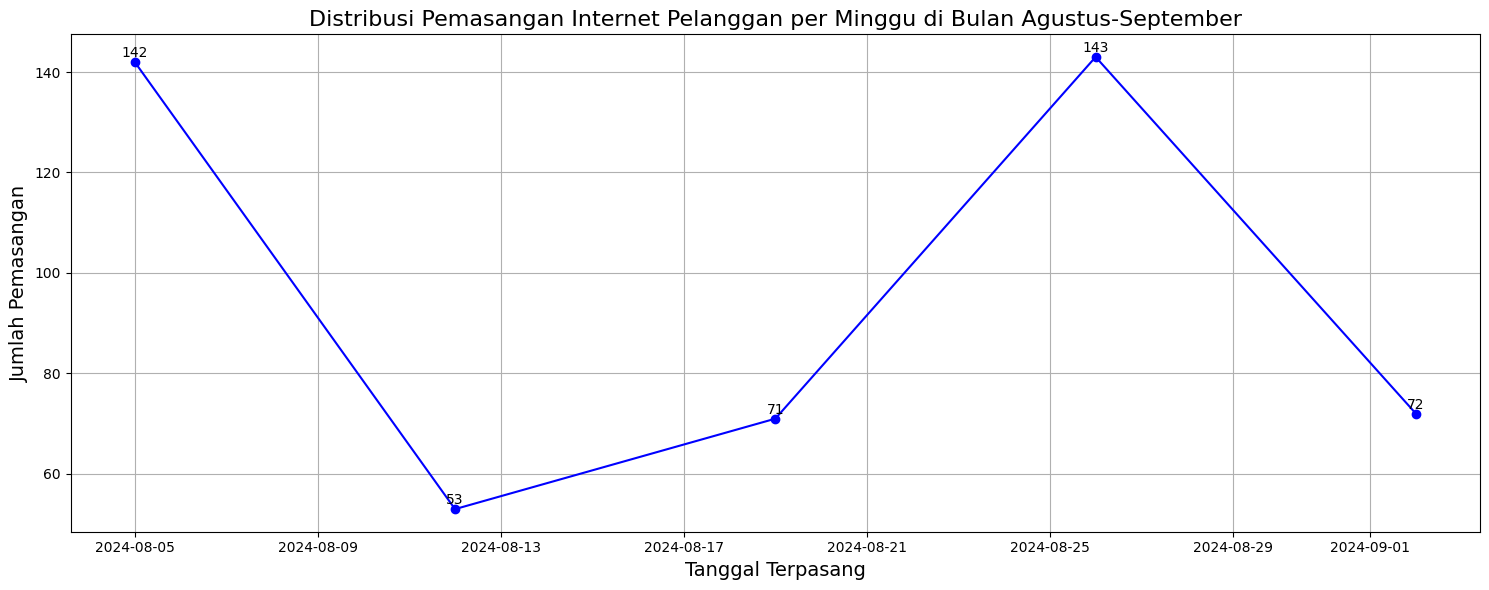

In [380]:
august_data = pelanggan_df[pelanggan_df['Tanggal_Terpasang'].dt.month == 8]


# Menghitung jumlah pemasangan per minggu
weekly_installations = august_data.resample('W-Mon', on='Tanggal_Terpasang').size()

# Menampilkan hasil per minggu
print("Jumlah pemasangan per minggu:")
print(weekly_installations)

# Membuat line plot untuk distribusi pemasangan per minggu
plt.figure(figsize=(15, 6))
plt.plot(weekly_installations.index, weekly_installations.values, color='blue', marker='o')

# Menambahkan label angka pada setiap titik
for i, value in enumerate(weekly_installations.values):
    plt.text(weekly_installations.index[i], value + 1, str(value), ha='center', fontsize=10, color='black')

# Memberikan judul dan label pada grafik
plt.title('Distribusi Pemasangan Internet Pelanggan per Minggu di Bulan Agustus-September', fontsize=16)
plt.xlabel('Tanggal Terpasang', fontsize=14)
plt.ylabel('Jumlah Pemasangan', fontsize=14)

# Menampilkan grid dan plot
plt.grid(True)
plt.tight_layout()
plt.show()

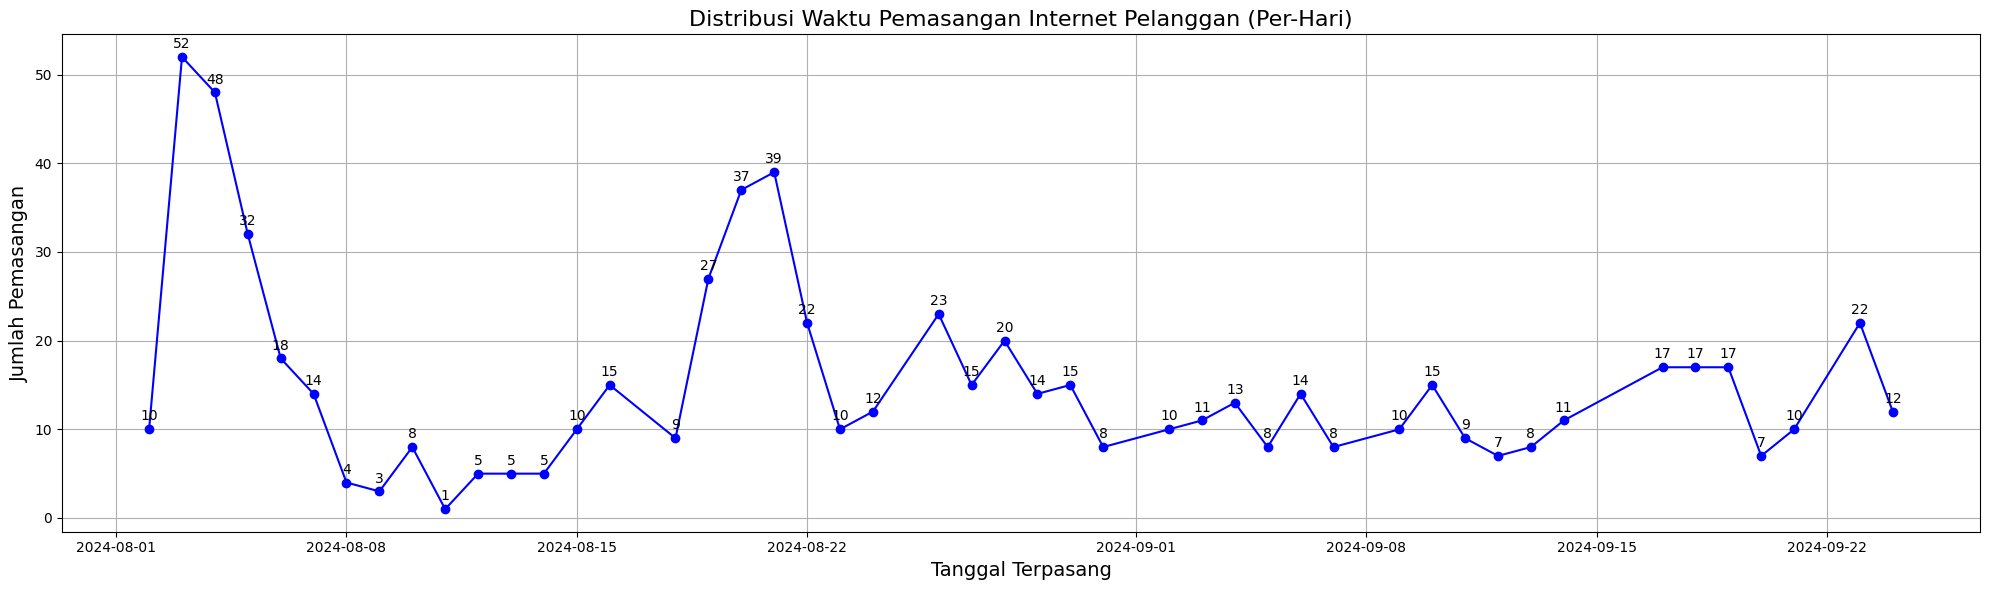

In [381]:
# Mengelompokkan data berdasarkan tanggal dan menghitung jumlah pemasangan
daily_installations = pelanggan_df.groupby(pelanggan_df['Tanggal_Terpasang'].dt.date).size()

# Membuat line plot untuk distribusi pemasangan per tanggal
plt.figure(figsize=(20, 6))
plt.plot(daily_installations.index, daily_installations.values, color='blue', marker='o')

# Menambahkan label angka pada setiap titik
for i, value in enumerate(daily_installations.values):
    plt.text(daily_installations.index[i], value + 1, str(value), ha='center', fontsize=10, color='black')

# Memberikan judul dan label pada grafik
plt.title('Distribusi Waktu Pemasangan Internet Pelanggan (Per-Hari)', fontsize=16)
plt.xlabel('Tanggal Terpasang', fontsize=14)
plt.ylabel('Jumlah Pemasangan', fontsize=14)

# Menampilkan grid dan plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [382]:
pelanggan_df.head()

,No_Reg,Tanggal_Terpasang,Tanggal_Jatuh_Tempo,Nama,Paket,Durasi,Biaya,Status,Lama_Berlangganan,Churn,Churn_numeric,Bulan
0,REGVB43151991166,2024-09-24 18:42:00,2024-10-24 23:59:00,Asep Saepulloh,Promo Free 100Mbps,30,0,aktif trial,30,Tidak,0,September
1,REGVB43151415629,2024-09-24 18:14:00,2024-10-24 23:59:00,Yuli Rahmawati,Promo Free 100Mbps,30,0,aktif trial,30,Tidak,0,September
2,REGVB43151147535,2024-09-24 17:36:00,2024-10-24 23:59:00,Lindawati,Promo Free 100Mbps,30,0,aktif trial,30,Tidak,0,September
3,REGVB43115764638,2024-09-24 17:13:00,2024-10-24 23:59:00,Mufti Aqila,Promo Free 100Mbps,30,0,aktif trial,30,Tidak,0,September
4,REGVB43151814101,2024-09-24 17:07:00,2024-10-24 23:59:00,M Asshidiek Nursyifa,Promo Free 100Mbps,30,0,aktif trial,30,Tidak,0,September


In [383]:
# # Menyimpan DataFrame ke file Excel
# file_path = 'Data_Pelanggan_Clean_2.xlsx'  # Nama file output
# pelanggan_df.to_excel(file_path, index=False)
# print(f'Dataset berhasil disimpan ke {file_path}')

### Bagaimana Performa Penjualan dan Revenue Perusahaan beberapa bulan terakhir ?

In [384]:
monthly_installations_df = pelanggan_df.resample(rule='M', on='Tanggal_Terpasang').agg({
    "No_Reg": "nunique",
    "Biaya": "sum"
})

monthly_installations_df.index = monthly_installations_df.index.strftime('%Y-%m')
monthly_installations_df = monthly_installations_df.reset_index ()
monthly_installations_df.rename(columns={
    "No_Reg": "install_count",
    "Biaya": "revenue"
}, inplace=True)
monthly_installations_df.head() 

C:\Users\faisa\AppData\Local\Temp\ipykernel_35976\185253101.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_installations_df = pelanggan_df.resample(rule='M', on='Tanggal_Terpasang').agg({


,Tanggal_Terpasang,install_count,revenue
0,2024-08,481,44836200
1,2024-09,226,0


C:\Users\faisa\AppData\Local\Temp\ipykernel_35976\2755530284.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_installations_df = pelanggan_df.resample(rule='M', on='Tanggal_Terpasang').agg({


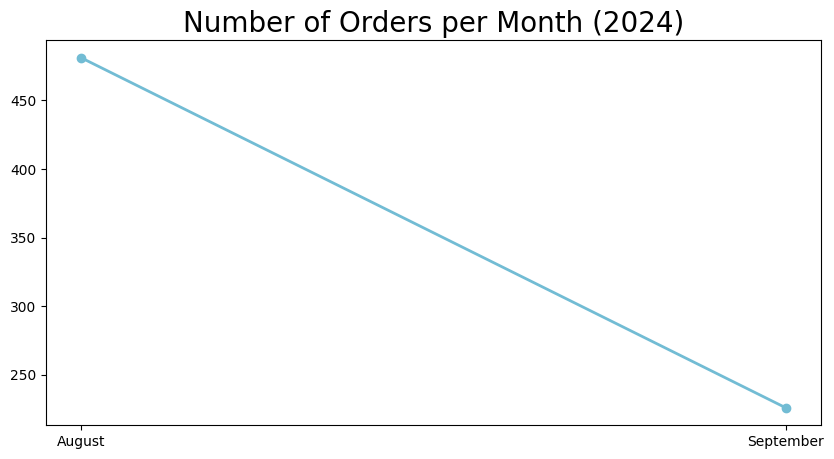

In [385]:
monthly_installations_df = pelanggan_df.resample(rule='M', on='Tanggal_Terpasang').agg({
    "No_Reg": "nunique",
    "Biaya": "sum"
})
monthly_installations_df.index = monthly_installations_df.index.strftime('%B') # ubah format nya menjadi bulan

monthly_installations_df = monthly_installations_df.reset_index()
monthly_installations_df.rename(columns={
    "No_Reg": "install_count",
    "Biaya": "revenue"
}, inplace=True)

# buat visualisasi
plt.figure(figsize=(10,5))
plt.plot(monthly_installations_df["Tanggal_Terpasang"], monthly_installations_df["install_count"], marker='o', linewidth=2, color='#72BCD4')
plt.title("Number of Orders per Month (2024)", loc="center", fontsize=20)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

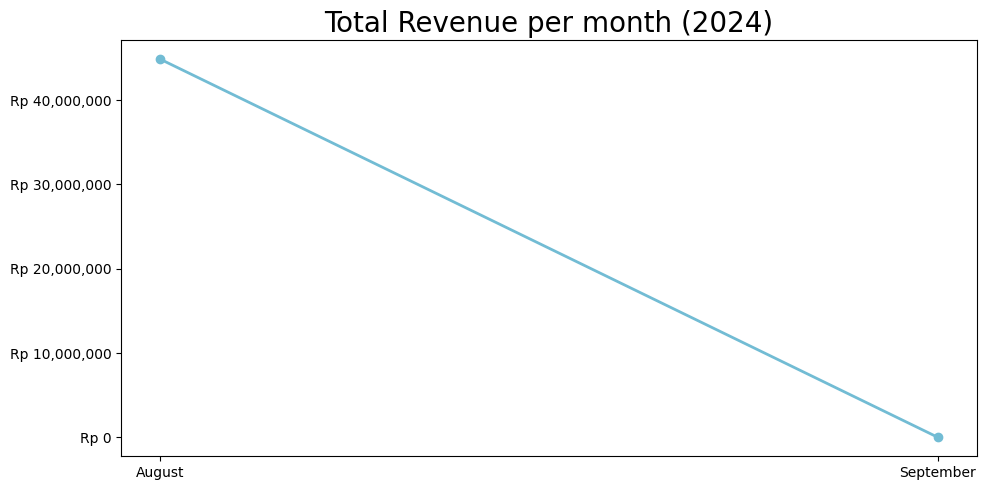

In [386]:
import matplotlib.ticker as ticker

plt.figure(figsize=(10,5))
plt.plot(
    monthly_installations_df['Tanggal_Terpasang'],
    monthly_installations_df['revenue'],
    marker='o',
    linewidth=2,
    color='#72BCD4'
)

plt.title("Total Revenue per month (2024)", loc='center', fontsize=20)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
# Menetapkan format pada sumbu y
def currency_formatter(x, pos):
    return f'Rp {int(x):,}'  # Menambahkan format Rp dan pemisah ribuan

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(currency_formatter))

plt.tight_layout()
plt.show()

In [387]:
package_sales_df = pelanggan_df.groupby('Paket').size().reset_index(name='quantity_x')

In [388]:
package_sales_df.head()

,Paket,quantity_x
0,FASUM 20 Mbps 1Y,3
1,LINK 200 Mbps - 30d,38
2,LINK 250 Mbps - 30d,47
3,LINK 300 Mbps - 30d,5
4,LINK 400 Mbps - 30d,4


In [389]:
pelanggan_df.head()

,No_Reg,Tanggal_Terpasang,Tanggal_Jatuh_Tempo,Nama,Paket,Durasi,Biaya,Status,Lama_Berlangganan,Churn,Churn_numeric,Bulan
0,REGVB43151991166,2024-09-24 18:42:00,2024-10-24 23:59:00,Asep Saepulloh,Promo Free 100Mbps,30,0,aktif trial,30,Tidak,0,September
1,REGVB43151415629,2024-09-24 18:14:00,2024-10-24 23:59:00,Yuli Rahmawati,Promo Free 100Mbps,30,0,aktif trial,30,Tidak,0,September
2,REGVB43151147535,2024-09-24 17:36:00,2024-10-24 23:59:00,Lindawati,Promo Free 100Mbps,30,0,aktif trial,30,Tidak,0,September
3,REGVB43115764638,2024-09-24 17:13:00,2024-10-24 23:59:00,Mufti Aqila,Promo Free 100Mbps,30,0,aktif trial,30,Tidak,0,September
4,REGVB43151814101,2024-09-24 17:07:00,2024-10-24 23:59:00,M Asshidiek Nursyifa,Promo Free 100Mbps,30,0,aktif trial,30,Tidak,0,September


In [390]:
# Menyimpan DataFrame ke file Excel
file_path = 'Data_Pelanggan_Cleaned.xlsx'  # Nama file output
pelanggan_df.to_excel(file_path, index=False)
print(f'Dataset berhasil disimpan ke {file_path}')

Dataset berhasil disimpan ke Data_Pelanggan_Cleaned.xlsx


In [391]:
pelanggan_df.describe(include='all')

,No_Reg,Tanggal_Terpasang,Tanggal_Jatuh_Tempo,Nama,Paket,Durasi,Biaya,Status,Lama_Berlangganan,Churn,Churn_numeric,Bulan
count,707,707,707,707,707,707.000000,707.000000,707,707.000000,707,707.000000,707
unique,707,NaN,NaN,704,10,NaN,NaN,5,NaN,2,NaN,2
top,REGVB43192298465,NaN,NaN,Saepul Alam,Promo Free 100Mbps,NaN,NaN,aktif,NaN,Tidak,NaN,August
freq,1,NaN,NaN,2,339,NaN,NaN,350,NaN,657,NaN,481
mean,NaN,2024-08-25 05:30:37.256011008,2024-10-12 00:43:48.543140096,NaN,NaN,31.421499,63417.538897,NaN,47.411598,NaN,0.070721,NaN
min,NaN,2024-08-02 16:58:00,2024-08-02 23:59:00,NaN,NaN,30.000000,0.000000,NaN,-1.000000,NaN,0.000000,NaN
25%,NaN,2024-08-08 13:19:00,2024-10-03 23:59:00,NaN,NaN,30.000000,0.000000,NaN,30.000000,NaN,0.000000,NaN
50%,NaN,2024-08-22 14:41:00,2024-10-10 23:59:00,NaN,NaN,30.000000,0.000000,NaN,33.000000,NaN,0.000000,NaN
75%,NaN,2024-09-06 13:17:00,2024-10-19 23:59:00,NaN,NaN,30.000000,99000.000000,NaN,61.000000,NaN,0.000000,NaN
max,NaN,2024-09-24 18:42:00,2025-08-26 23:59:00,NaN,NaN,365.000000,555000.000000,NaN,367.000000,NaN,1.000000,NaN


In [398]:
frekuensi_nama = pelanggan_df['No_Reg'].value_counts()

# Mengubah hasil menjadi DataFrame untuk kemudahan tampilan
frekuensi_nama_df = frekuensi_nama.reset_index()
frekuensi_nama_df.columns = ['No_Reg', 'Frekuensi']

print(frekuensi_nama_df)

               No_Reg  Frekuensi
0    REGVB43192298465          1
1    REGVB43151991166          1
2    REGVB43151415629          1
3    REGVB43192459328          1
4    REGVB43192123095          1
..                ...        ...
702  REGVB43115781356          1
703  REGVB43115311975          1
704  REGVB43151948152          1
705  REGVB43151814101          1
706  REGVB43115764638          1

[707 rows x 2 columns]


In [396]:
rfm_df = pelanggan_df.groupby(by='No_Reg', as_index=False).agg({
    'Tanggal_Terpasang': 'max',
    'Nama': 'nunique',
    'Biaya': 'sum'
})
rfm_df.columns = ['No_Reg', 'max_order_timestamp', 'frequency', 'monetary']

rfm_df['max_order_timestamp'] = rfm_df['max_order_timestamp'].dt.date
recent_date = pelanggan_df['Tanggal_Terpasang'].dt.date.max()
rfm_df['recency'] = rfm_df['max_order_timestamp'].apply(lambda x: (recent_date - x).days)

rfm_df.drop('max_order_timestamp', axis=1, inplace=True)
rfm_df.head()

,No_Reg,frequency,monetary,recency
0,REGVB43112130057,1,0,13
1,REGVB43112336868,1,99000,31
2,REGVB43113225477,1,99000,34
3,REGVB43113320553,1,0,13
4,REGVB43113417402,1,0,27


C:\Users\faisa\AppData\Local\Temp\ipykernel_35976\3031214066.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\faisa\AppData\Local\Temp\ipykernel_35976\3031214066.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\faisa\AppData\Local\Temp\ipykernel_35976\3031214066.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


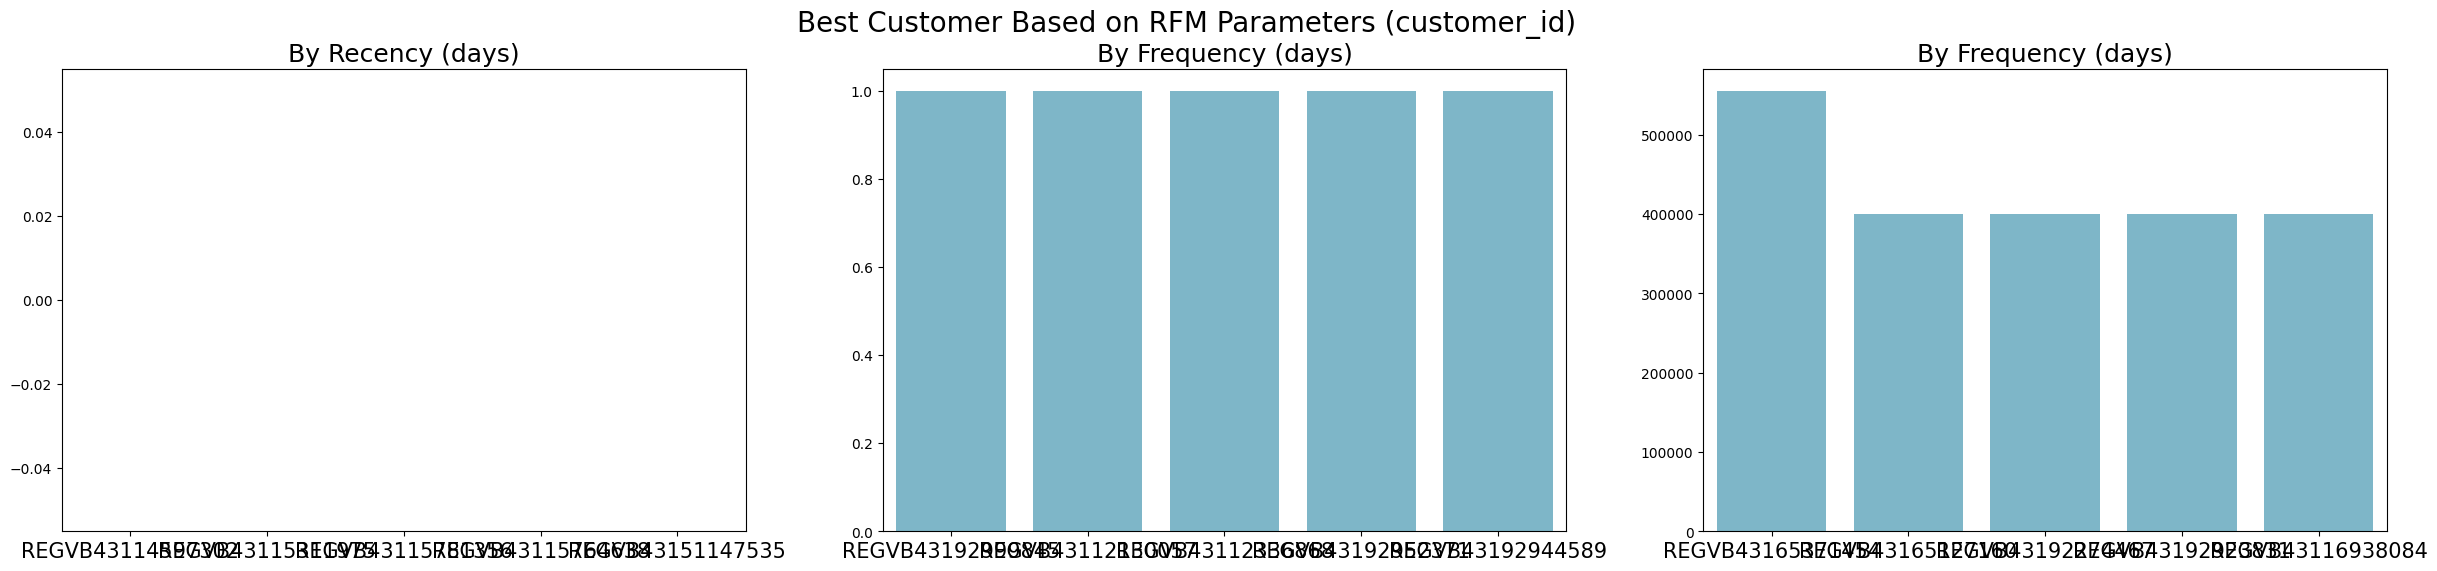

In [397]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30,6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(
    y='recency',
    x='No_Reg',
    data=rfm_df.sort_values(by='recency', ascending=True).head(5),
    palette= colors,
    ax=ax[0]
)

ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('By Recency (days)', loc='center', fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

sns.barplot(
    y='frequency',
    x='No_Reg',
    data=rfm_df.sort_values(by='frequency', ascending=False).head(5),
    palette= colors,
    ax=ax[1]
)

ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title('By Frequency (days)', loc='center', fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(
    y='monetary',
    x='No_Reg',
    data=rfm_df.sort_values(by='monetary', ascending=False).head(5),
    palette= colors,
    ax=ax[2]
)

ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title('By Frequency (days)', loc='center', fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

In [403]:
# Mendefinisikan rentang waktu 2 hingga 3 Agustus
start_date = '2024-08-02'
end_date = '2024-08-03'

# Filter data berdasarkan rentang tanggal
filtered_df = pelanggan_df[(pelanggan_df['Tanggal_Terpasang'] >= start_date) & 
                           (pelanggan_df['Tanggal_Terpasang'] < pd.to_datetime(end_date) + pd.Timedelta(days=1))]

# Cek apakah ada nama yang sama
duplicate_names = filtered_df[filtered_df.duplicated(subset=['Nama'], keep=False)]

# Jika ada nama yang sama, tampilkan biaya dari masing-masing pelanggan
if not duplicate_names.empty:
    # Mengurutkan berdasarkan biaya dari yang terbesar
    sorted_duplicates = duplicate_names.sort_values(by='Biaya', ascending=False)
    
    print("Nama yang sama dan biaya masing-masing pelanggan, diurutkan dari yang terbesar:")
    print(sorted_duplicates[['Nama', 'Biaya']])
else:
    print("Tidak ada nama yang sama dalam rentang tanggal 2-3 Agustus.")

Nama yang sama dan biaya masing-masing pelanggan, diurutkan dari yang terbesar:
               Nama  Biaya
646  Nendi Sulaeman  99000
689  Nendi Sulaeman  99000


In [401]:
pelanggan_df.head()

,No_Reg,Tanggal_Terpasang,Tanggal_Jatuh_Tempo,Nama,Paket,Durasi,Biaya,Status,Lama_Berlangganan,Churn,Churn_numeric,Bulan
0,REGVB43151991166,2024-09-24 18:42:00,2024-10-24 23:59:00,Asep Saepulloh,Promo Free 100Mbps,30,0,aktif trial,30,Tidak,0,September
1,REGVB43151415629,2024-09-24 18:14:00,2024-10-24 23:59:00,Yuli Rahmawati,Promo Free 100Mbps,30,0,aktif trial,30,Tidak,0,September
2,REGVB43151147535,2024-09-24 17:36:00,2024-10-24 23:59:00,Lindawati,Promo Free 100Mbps,30,0,aktif trial,30,Tidak,0,September
3,REGVB43115764638,2024-09-24 17:13:00,2024-10-24 23:59:00,Mufti Aqila,Promo Free 100Mbps,30,0,aktif trial,30,Tidak,0,September
4,REGVB43151814101,2024-09-24 17:07:00,2024-10-24 23:59:00,M Asshidiek Nursyifa,Promo Free 100Mbps,30,0,aktif trial,30,Tidak,0,September
